In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal 
from mat4py import loadmat
from os import listdir
from os.path import isfile, join
myPath = "../data/"
#myPath = "C:\\Users\\Romain\\OneDrive\\Documents\\Cours\\Phelma\\3A SICOM\\Deuxieme_partie\\wind_turbine\\data"

files = [f for f in listdir(myPath) if isfile(join(myPath, f))]
files.pop(0)

'.DS_Store'

2014-03-26-1730i1.mat
2014-04-01-1059i1.mat
2014-04-03-0737i1.mat
2014-04-09-1620i1.mat
2014-04-24-1349i1.mat
2014-04-28-0759i1.mat
Loaded and Data cropped


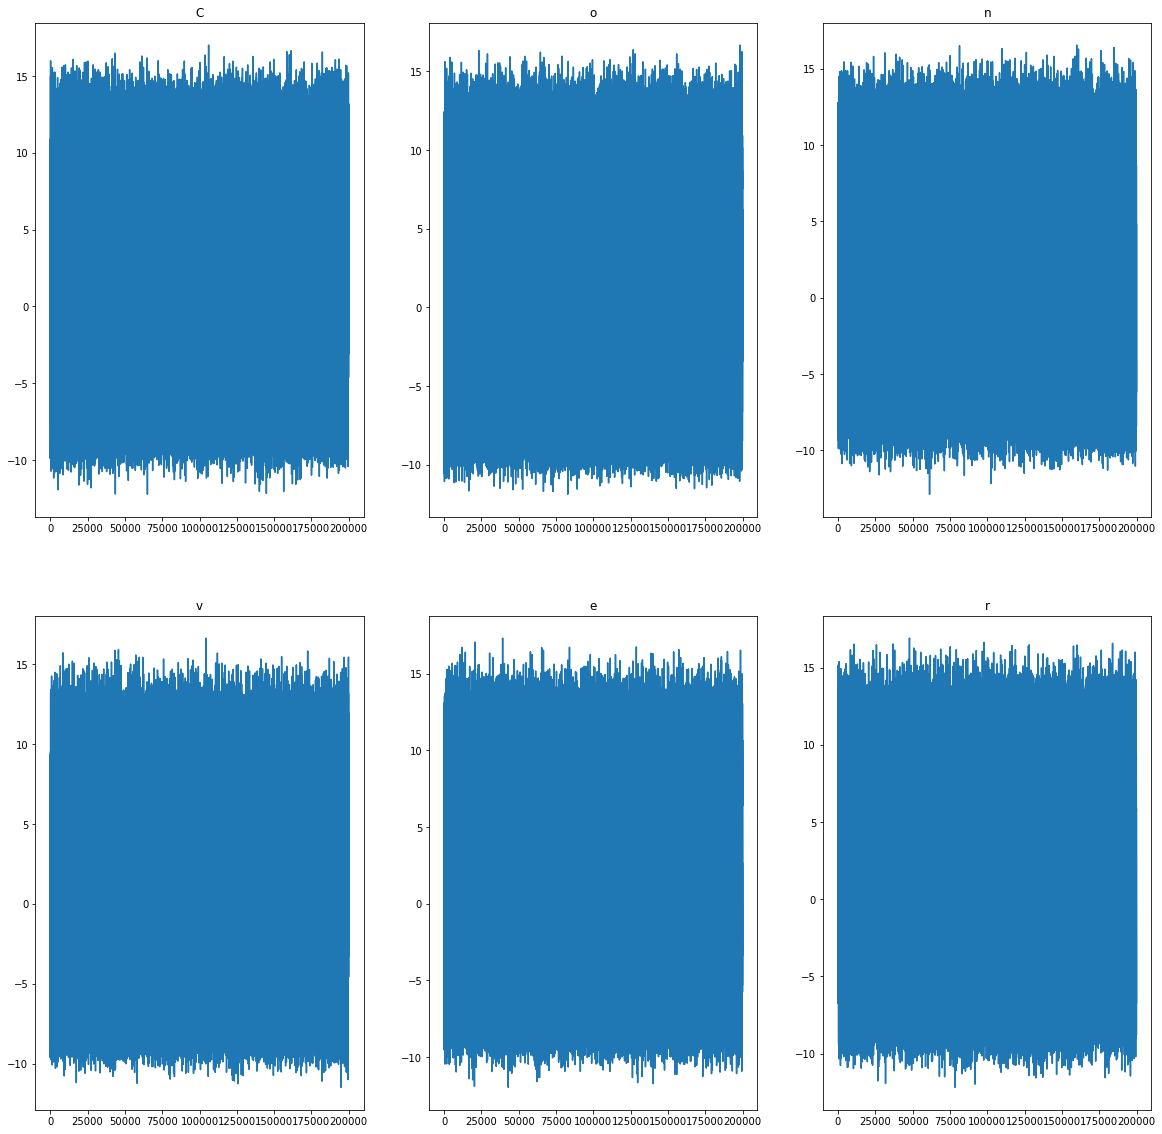

In [6]:
keywords  = ['hss', 'i1', 'i2', 'i3', 'lss', 'v1', 'v2', 'v3', 'vib1', 'vib2', 'vib3']
keyword = keywords[1]
loaded_data = []
for file in files:
    if keyword in file:
        print(file)
        loaded_data.append(loadmat(myPath+file))

data = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
    fs = b["fs"]
#TODO generate time  axis from sampling time  

for i in range(len(data)):
    data[i] = data[i][100:-100]
print("Loaded and Data cropped")

plt.figure(figsize = (20,20))
for i in range(len(data)):        
    plt.subplot(231+i)
    plt.plot(data[i])
    plt.title(file[i])

c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


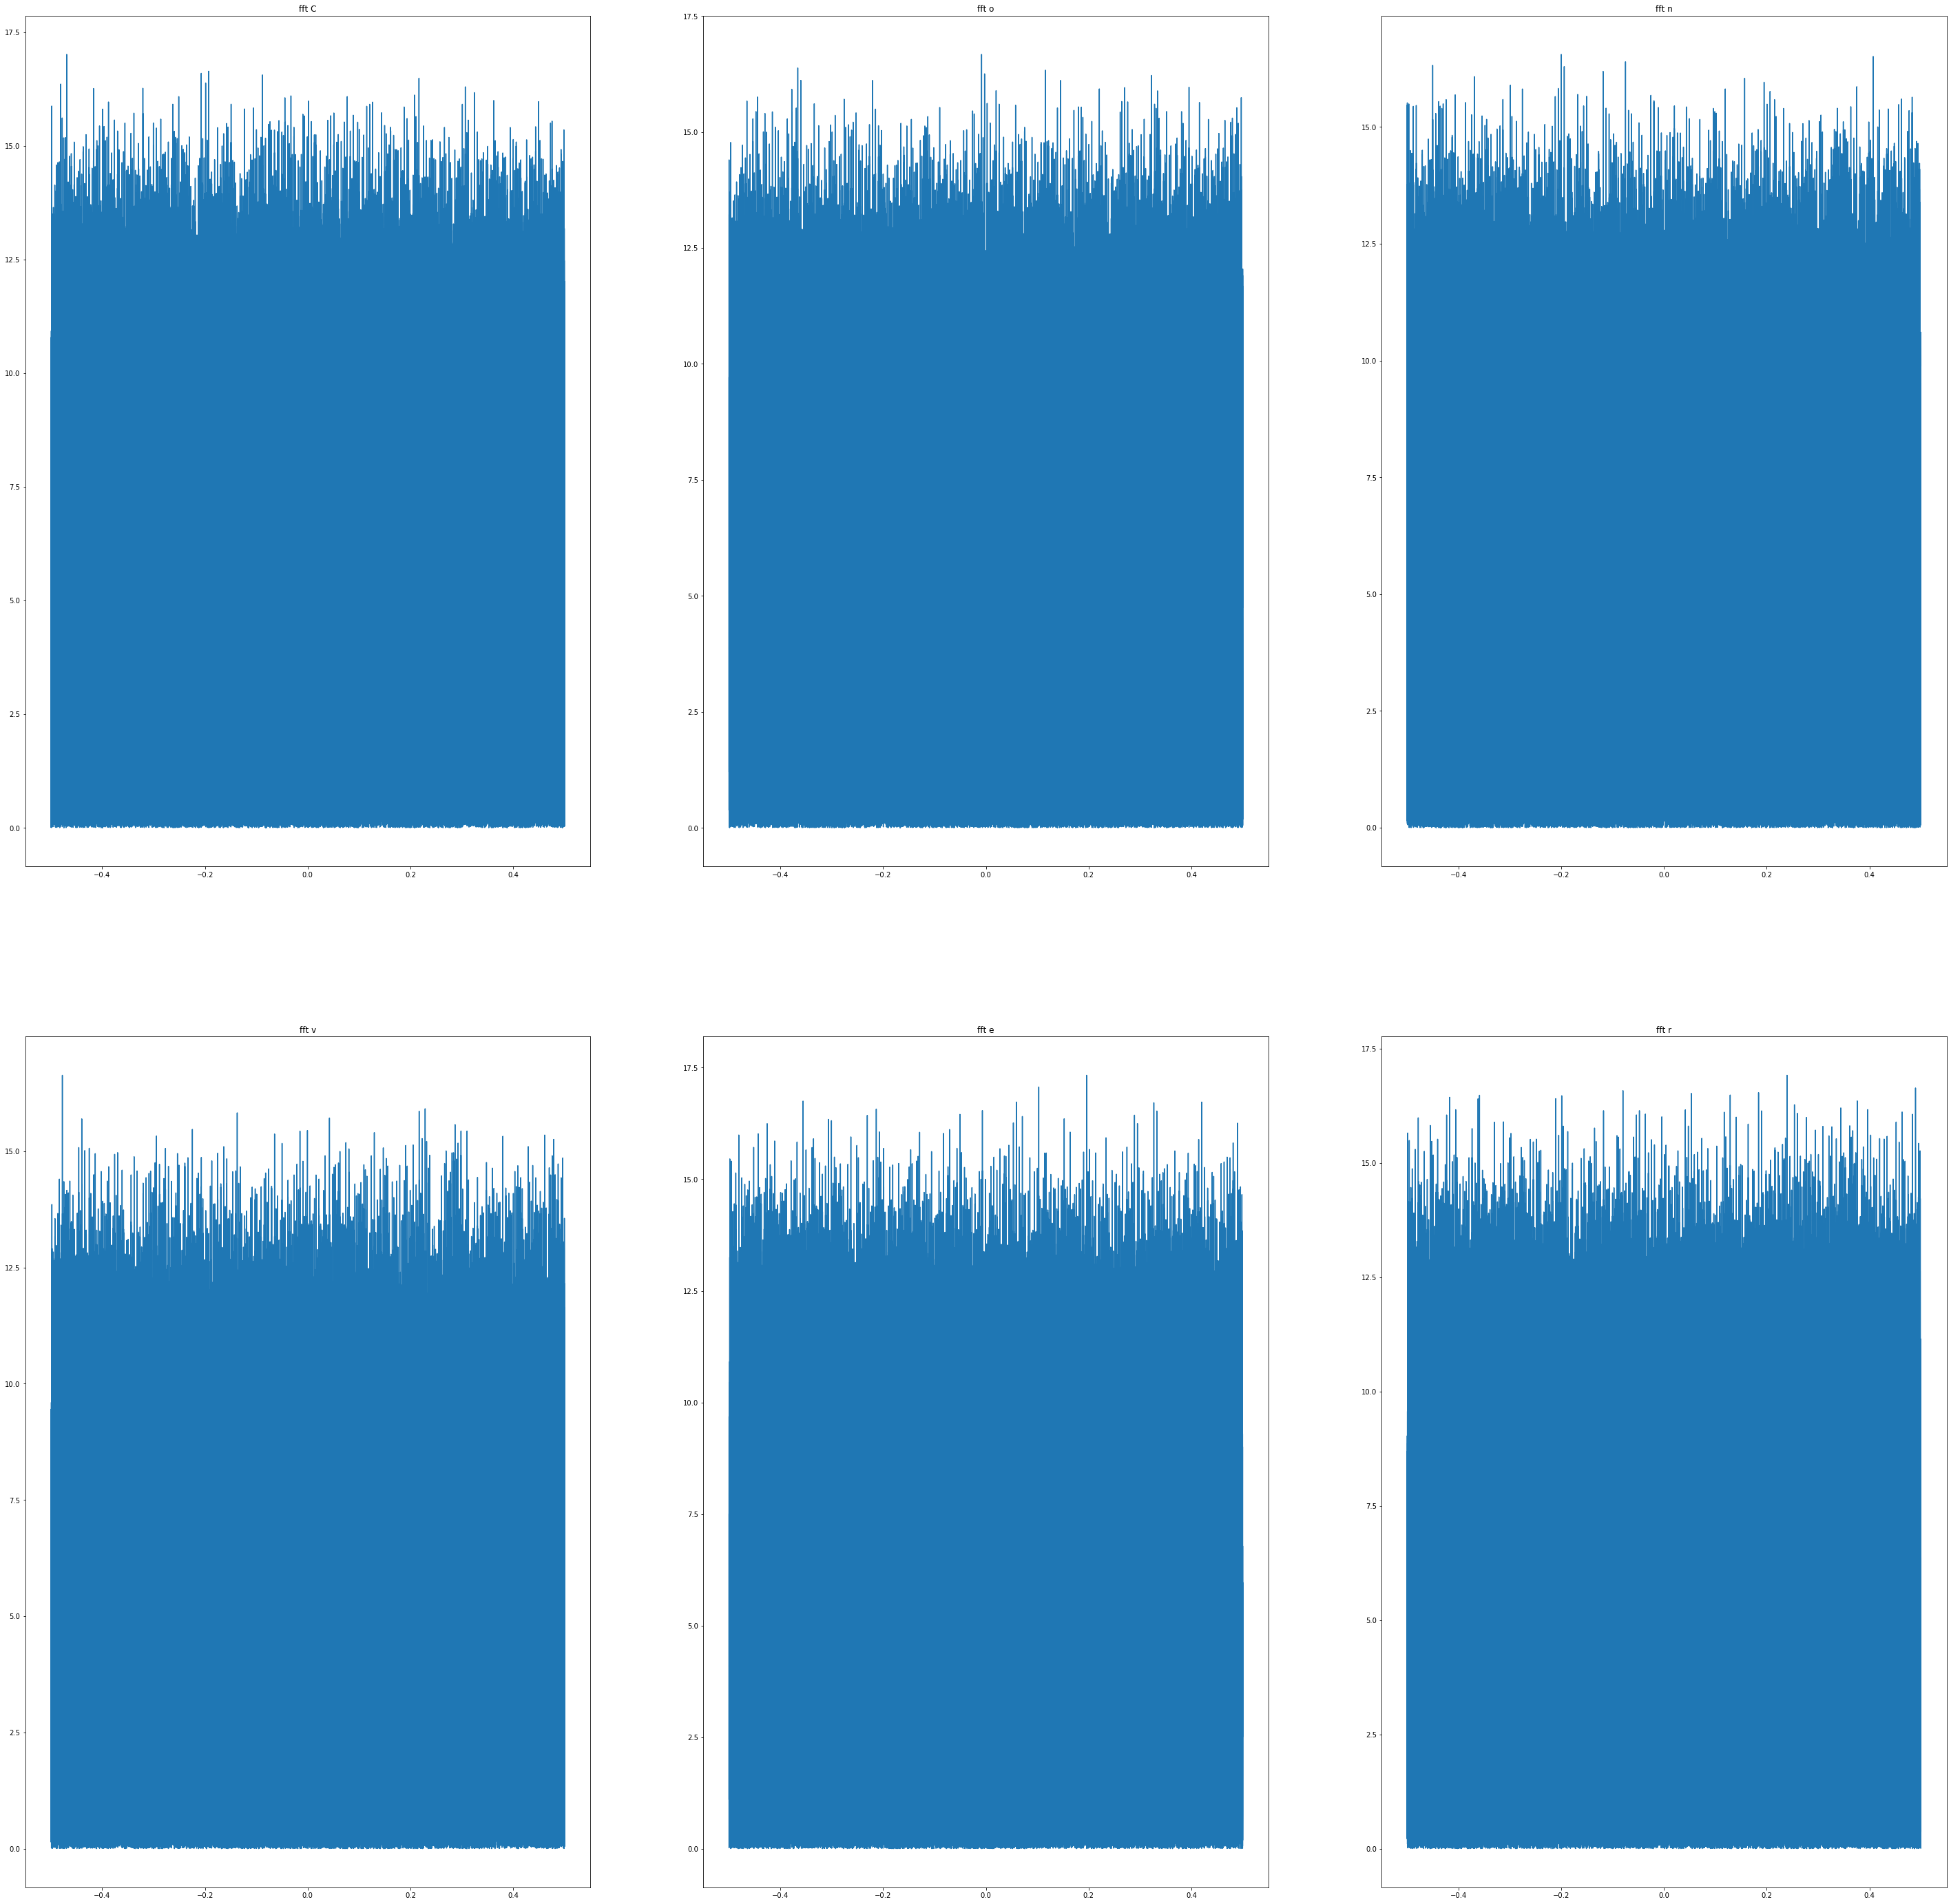

In [7]:
plt.figure(2, figsize = (50,50))
for i in range(len(data)): 
    plt.figure(2)
    plt.subplot(231+i)
    ft = np.absolute(np.fft.fft(data[i]))
    np.delete(ft, np.max(ft))
    ftFreq = np.fft.fftfreq(len(data[i]))
    plt.plot(ftFreq, ft)
    
    
    plt.title("fft " + file[i])
    
    #print(ft)

c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 976562 is greater than input length  = 1, using nperseg = 1
  .format(nperseg, input_length))


MemoryError: Unable to allocate array with shape (199900, 1, 39062) and data type float64

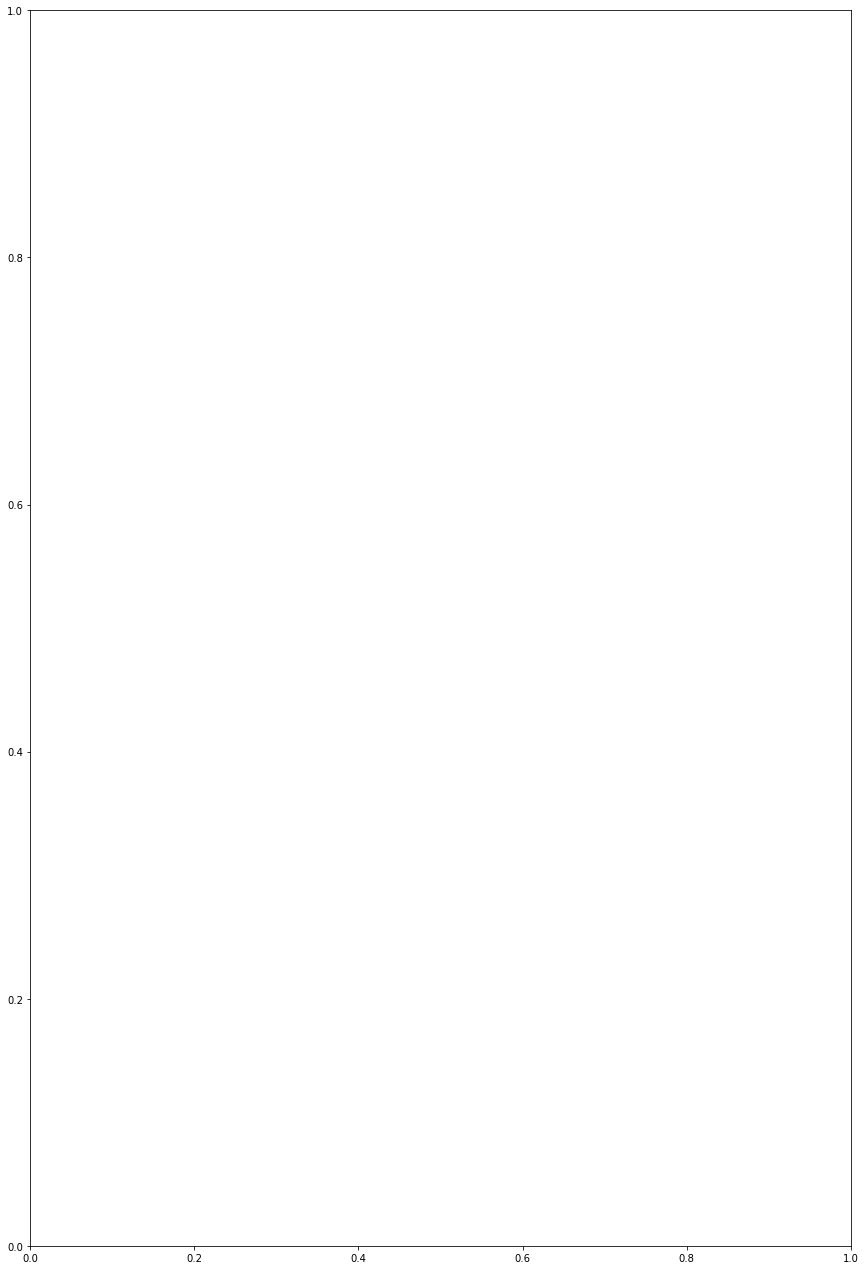

In [8]:
plt.figure(figsize = (50,50))
welch = []
for i in range(len(data)):
    plt.subplot(231+i)
    #frq, welch = scipy.signal.welch(data[i], fs = fs, nperseg=8000, nfft=80000)
    frq, welch_temp = scipy.signal.welch(data[i], fs = fs, nperseg=fs*25, nfft = fs)
    welch.append(welch_temp)
    plt.title("welch " + file[i])
    plt.plot(frq, welch[i])    
       
    plt.xlim((64,70))
    #plt.ylim((-0.00001, 0.0002))

plt.savefig('./images/welch_'+keyword, dpi = 300)
